### COURSERA / специализация МАШИННОЕ ОБУЧЕНИЕ И АНАЛИЗ ДАННЫХ (МФТИ)
### Курс 1: Математика и Python для анализа данных.
### Задание, оцениваемое сокурсниками: Центральная предельная теорема своими руками
В этом задании вам предстоит проверить работу центральной предельной теоремы, а также поработать с генерацией случайных чисел и построением графиков в Питоне. 

Выберите ваше любимое непрерывное распределение (чем меньше оно будет похоже на нормальное, тем интереснее; попробуйте выбрать какое-нибудь распределение из тех, что мы не обсуждали в курсе). Сгенерируйте из него выборку объёма 1000, постройте гистограмму выборки и нарисуйте поверх неё теоретическую плотность распределения вашей случайной величины (чтобы величины были в одном масштабе, не забудьте выставить у гистограммы значение параметра normed=True -> density=True).

Ваша задача — оценить распределение выборочного среднего вашей случайной величины при разных объёмах выборок. Для этого при трёх и более значениях n (например, 5, 10, 50) сгенерируйте 1000 выборок объёма n и постройте гистограммы распределений их выборочных средних. Используя информацию о среднем и дисперсии исходного распределения (её можно без труда найти в википедии), посчитайте значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних. Обратите внимание: для подсчёта значений этих параметров нужно использовать именно теоретические среднее и дисперсию вашей случайной величины, а не их выборочные оценки. Поверх каждой гистограммы нарисуйте плотность соответствующего нормального распределения (будьте внимательны с параметрами функции, она принимает на вход не дисперсию, а стандартное отклонение).

Опишите разницу между полученными распределениями при различных значениях n. Как меняется точность аппроксимации распределения выборочных средних нормальным с ростом n?

Решение должно представлять собой IPython-ноутбук, содержащий:

1. код, генерирующий выборки и графики;
2. краткие описания каждого блока кода, объясняющие, что он делает;
3. необходимые графики (убедитесь, что на них подписаны оси);
4. выкладки с вычислениями параметров нормальных распределений, аппроксимирующих выборочные средние при различных n;
5. выводы по результатам выполнения задания.

### Задача. Центральная предельная теорема своими руками

#### 1. Загружаем библиотеки

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import chi2
%matplotlib inline

#### 2. Сгенерируем выборку объема 1000 из распределения Хи-квадрат, построим гистограмму выборки и график теороетической плотности распределения случайной величины

Text(0.5, 0, '$x$')

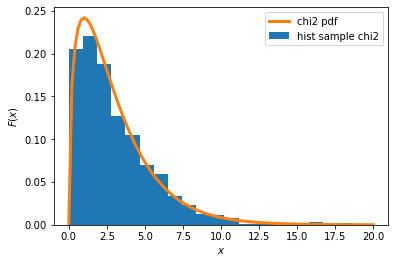

In [2]:
# задаем выборку из распределения Хи-квадрат случайной величины с параметром k=4
k = 3
chi2_rv = sts.chi2(k)
sample = chi2_rv.rvs(1000)

# строим гистограмму выборки
plt.hist(sample, density=True, bins=20, label='hist sample chi2')

# строим график теоретической плотности распределения случайной величины
x = np.linspace(0, 20, 100)
rv = sts.chi2(k)
pdf = rv.pdf(x)
plt.plot(x, pdf, lw=3, label='chi2 pdf')
plt.legend()
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

#### 3. Оценим распределение выборочного среднего случайной величины при разных объемах выборок

#### 3.1 Для объема n=5 cгенерируем 1000 выборок и построим гистограмму распределения выборочного среднего

Теоретические значения распределения: Ex = 3.0 STD =  2.449489742783178  DX =  5.999999999999999
Расчетные значения: мат. ожидание =  3.0 sigma =  1.0954451150103321


Text(0.5, 0, '$x$')

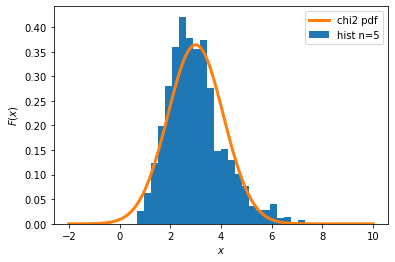

In [3]:
n = 5

# генерация выборки
values = np.array([chi2_rv.rvs(n) for x in range(1000)])

# вычисление выборочных средних и построение гистограммы
meanVal = values.mean(axis=1)
plt.hist(meanVal, density=True, bins='auto', label='hist n=5')
plt.legend()
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

# вычисление теоретических EX, std, DX распределения:
# EX - мат. ожидание
EX = chi2.mean(k)
# STD - среднеквадратическое отклонение
std = chi2.std(k)
# DX - дисперсия
DX = std**2
print('Теоретические значения распределения: Ex =', EX, 'STD = ', std, ' DX = ', DX)

#расчет мат. ожидания и sigma нормального распределения
mu = EX
sigma = math.sqrt(DX/n)
print('Расчетные значения: мат. ожидание = ', mu, 'sigma = ', sigma)

# построим график нормального распределения
norm_rv = sts.norm(mu, sigma)
x = np.linspace(-2, 10, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, lw=3, label='chi2 pdf')
plt.legend()
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

#### 3.2 Для объема n=10 cгенерируем 1000 выборок и построим гистограмму распределения выборочного среднего

Расчетные значения: мат. ожидание =  3.0 sigma =  0.7745966692414833


Text(0.5, 0, '$x$')

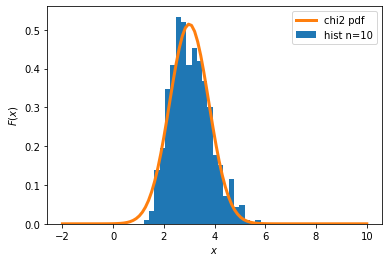

In [4]:
n = 10

# генерация выборки
values = np.array([chi2_rv.rvs(n) for x in range(1000)])

# вычисление выборочных средних
meanVal = values.mean(axis=1)
plt.hist(meanVal, density=True, bins='auto', label='hist n=10')
plt.legend()
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

#расчет мат. ожидания и sigma нормального распределения
mu = EX
sigma = math.sqrt(DX/n)
print('Расчетные значения: мат. ожидание = ', mu, 'sigma = ', sigma)

# построим график нормального распределения
norm_rv = sts.norm(mu, sigma)
x = np.linspace(-2, 10, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, lw=3, label='chi2 pdf')
plt.legend()
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

#### 3.3 Для объема n=50 cгенерируем 1000 выборок и построим гистограмму распределения выборочного среднего

Расчетные значения: мат. ожидание =  3.0 sigma =  0.3464101615137754


Text(0.5, 0, '$x$')

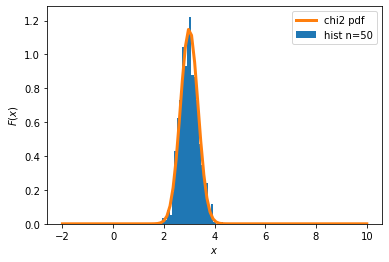

In [5]:
n = 50

# генерация выборки
values = np.array([chi2_rv.rvs(n) for x in range(1000)])

# вычисление выборочных средних
meanVal = values.mean(axis=1)
plt.hist(meanVal, density=True, bins='auto', label='hist n=50')
plt.legend()
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

#расчет мат. ожидания и sigma нормального распределения
mu = EX
sigma = math.sqrt(DX/n)
print('Расчетные значения: мат. ожидание = ', mu, 'sigma = ', sigma)

# построим график нормального распределения
norm_rv = sts.norm(mu, sigma)
x = np.linspace(-2, 10, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, lw=3, label='chi2 pdf')
plt.legend()
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

#### 3.4 Для объема n=100 cгенерируем 1000 выборок и построим гистограмму распределения выборочного среднего

Расчетные значения: мат. ожидание =  3.0 sigma =  0.2449489742783178


Text(0.5, 0, '$x$')

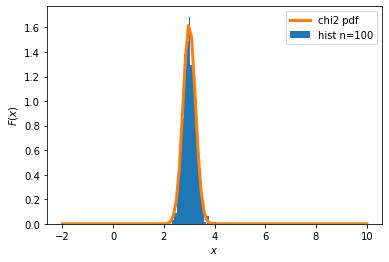

In [6]:
n = 100

# генерация выборки
values = np.array([chi2_rv.rvs(n) for x in range(1000)])

# вычисление выборочных средних
meanVal = values.mean(axis=1)
plt.hist(meanVal, density=True, bins='auto', label='hist n=100')
plt.legend()
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

#расчет мат. ожидания и sigma нормального распределения
mu = EX
sigma = math.sqrt(DX/n)
print('Расчетные значения: мат. ожидание = ', mu, 'sigma = ', sigma)

# построим график нормального распределения
norm_rv = sts.norm(mu, sigma)
x = np.linspace(-2, 10, 100)
pdf = norm_rv.pdf(x)
plt.plot(x, pdf, lw=3, label='chi2 pdf')
plt.legend()
plt.ylabel('$F(x)$')
plt.xlabel('$x$')

#### 4. Выводы
Распределение выборочных средних для функции Хи-квадрат хорошо описывается нормальным распределением.
С ростом объема (n) точность аппроксимации увеличивается.